# Iris Classification

## Import the Libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import the data

In [62]:
data = pd.read_csv('Iris.csv')
data = data.drop(columns=['Id'])
data.head()
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Splitting the data

In [63]:
X = data.drop(columns=['Species'],axis=1).values
y = data['Species'].values

## Encoding the dependent variable

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

## Test train split

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

## Model selection

In [66]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

## Predicting the result

In [67]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [2 1]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [2 2]]


## Confusion matrix

0.9666666666666667

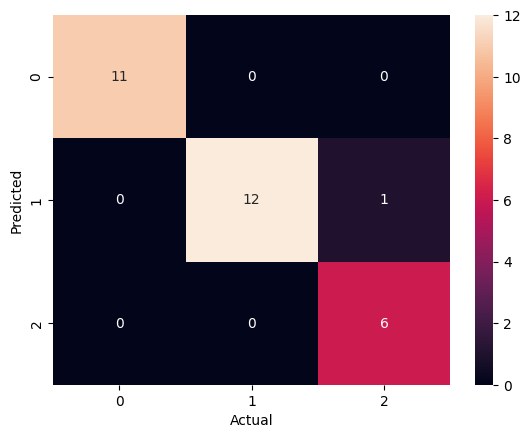

In [68]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_test,y_pred)

import seaborn as sns
sns.heatmap(cm, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
accuracy_score(y_test,y_pred)

## Saving the trained model

In [69]:
import pickle
filename = 'trained_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

## Loading the trained model

In [70]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))